In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
from plotting import plot_surf_stat_map, crop_img
import matplotlib as mpl
import cmocean

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def brain_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(20,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    fig.subplots_adjust(right=0.7)
    return fig

### Load meshes and masks

In [78]:
rh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_200.vtk'
lh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_200.vtk'
rh_sulc_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_200_sulc.npy'
lh_sulc_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_200_sulc.npy'
mask_file='/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_viz.npy'

In [79]:
rh_sulc=np.load(rh_sulc_file)
rv, rf, rd = read_vtk(rh_mesh_file)
lh_sulc=np.load(lh_sulc_file)
lv, lf, ld = read_vtk(lh_mesh_file)
mask=np.load(mask_file)

### FC / dist correlation

In [80]:
fc_dist = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/fc_dist_corr.npy')
fc_t1 = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/fc_t1_corr.npy')
t1_dist = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/dist_t1_corr.npy')
resid_corr = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/t1resid_fcresid_corr.npy')

In [81]:
fc_dist[mask] = 0
fc_t1[mask] = 0
t1_dist[mask] = 0
resid_corr[mask] = 0

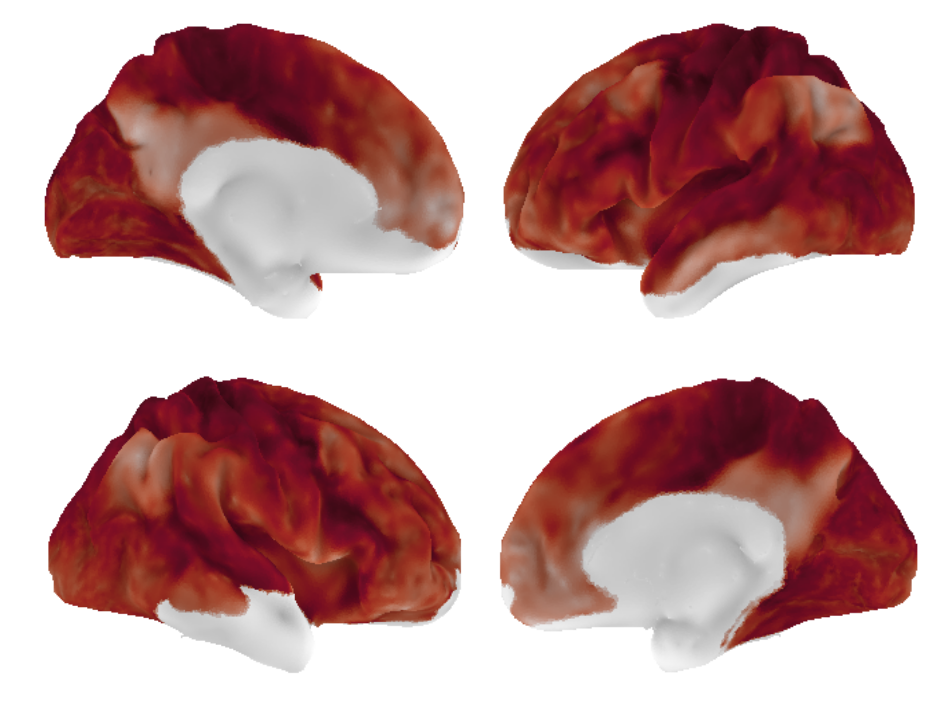

In [82]:
cropped_img = []
vmin=-0.6
vmax=0
sns.set_style('white')
for corr in [fc_t1]:#, resid_corr]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=corr[:lv.shape[0]], 
                                bg_map=lh_sulc, bg_on_stat=True, 
                                darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,7.5),threshold=1e-50, 
                                cmap=cmocean.cm.amp_r,
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))

    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=corr[lv.shape[0]:], bg_map=rh_sulc, bg_on_stat=True, 
                                darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,7.5) ,threshold=1e-50,
                               cmap=cmocean.cm.amp_r,
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))
    
# dorsal: 270, 90, 9/10 or 10/10
# occ: 200, 90, 
    
plot=brain_fig(cropped_img)

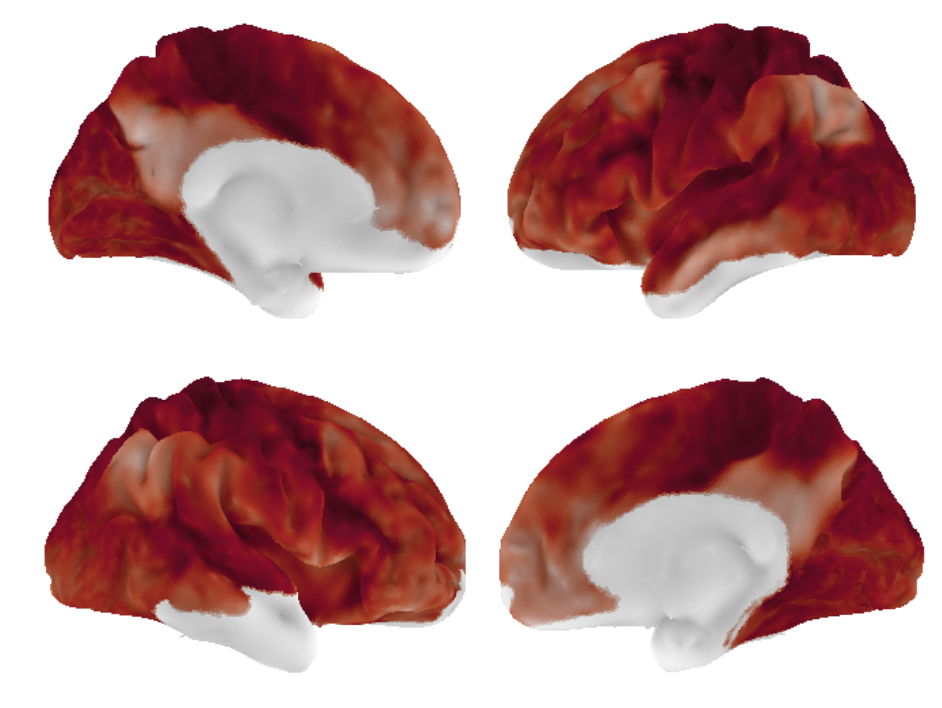

In [77]:
cropped_img = []
vmin=-0.6
vmax=0
sns.set_style('white')
for corr in [fc_t1]:#, resid_corr]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=corr[:lv.shape[0]], 
                                bg_map=lh_sulc, bg_on_stat=True, 
                                darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,9),threshold=1e-50, 
                                cmap=cmocean.cm.amp_r,
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))

    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=corr[lv.shape[0]:], bg_map=rh_sulc, bg_on_stat=True, 
                                darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,7.3) ,threshold=1e-50,
                               cmap=cmocean.cm.amp_r,
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_img.append(crop_img(plot))
    
# dorsal: 270, 90, 9/10 or 10/10
# occ: 200, 90, 
    
plot=brain_fig(cropped_img)

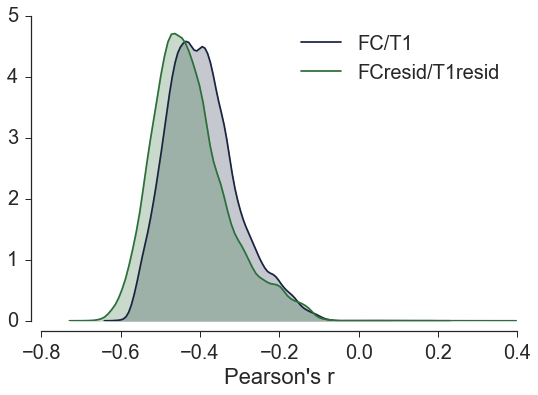

In [13]:
fig = plt.figure(figsize=(8,6))
colors = sns.color_palette('cubehelix', 20)
sns.set_style('ticks')
sns.set_context('notebook', font_scale=2)
#sns.kdeplot(fc_dist[fc_dist!=0], label='FC/dist', shade=True, color=colors[11])
#sns.kdeplot(t1_dist[t1_dist!=0], label='T1/dist', shade=True, color=colors[14])
sns.kdeplot(fc_t1[fc_t1!=0], label='FC/T1', shade=True, color=colors[2])
sns.kdeplot(resid_corr[resid_corr!=0],  label='FCresid/T1resid', shade=True, color=colors[6])
plt.xlabel("Pearson's r")
plt.legend()
sns.despine(offset=10)
fig.tight_layout()
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/new_fig2_hist.svg')

In [71]:
cropped_img = []
vmin=-0.6
vmax=-0.1
sns.set_style('white')
for corr in [fc_dist, t1_dist]:
    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=corr[:lv.shape[0]], bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,7.5) ,threshold=1e-50, cmap='RdBu_r')
        cropped_img.append(crop_img(plot))

    for (elev, azim) in [(180, 0), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=corr[lv.shape[0]:], bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                            elev=elev,azim=azim, figsize=(10,7.7) ,threshold=1e-50, cmap='RdBu_r')
        cropped_img.append(crop_img(plot))

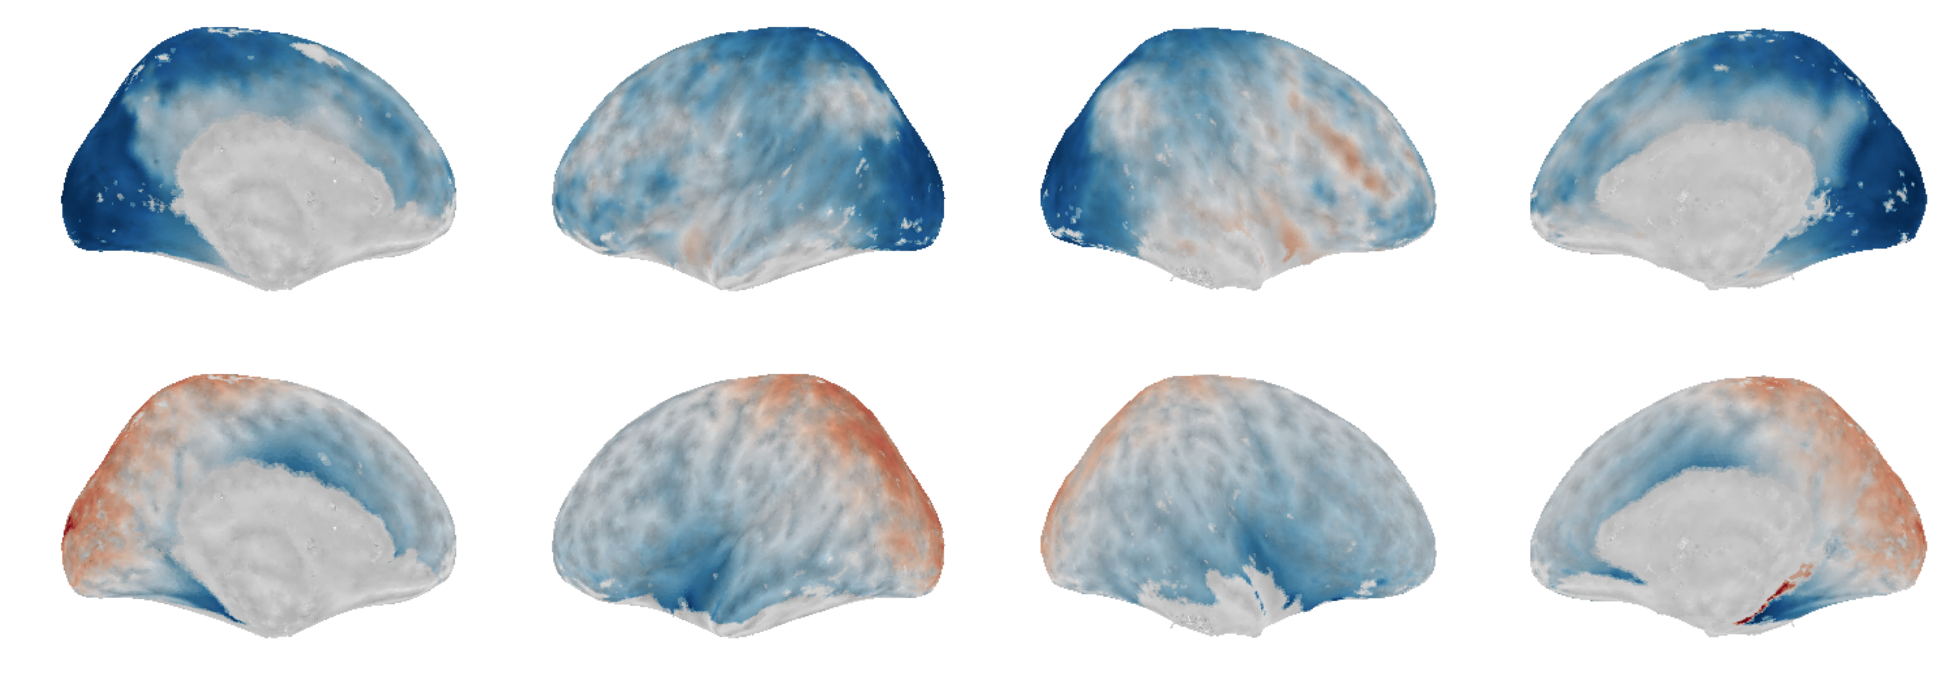

In [72]:
plot=brain_fig(cropped_img)

In [73]:
plot.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript/nodewise_corr_dist.png')

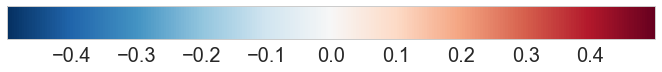

In [77]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2)
cmap = plt.get_cmap('RdBu_r')
norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
fig_hcbar = plt.figure(figsize=(10, 3))
ax1 = fig_hcbar.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', 
                          ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])

In [78]:
fig_hcbar.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/corr_T1_dist.svg')

In [ ]:
FC_dist